# Introduction to scikit learn
helps to demostrate somes of the useful function of its library

## An end to end sklearn workflow


In [1]:
# 1.Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_disease =pd.read_csv("heart-disease.csv")

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Create X (feature matrix)
X=heart_disease.drop("target",axis=1)

# Create Y (label matrix)
Y=heart_disease["target"]

In [6]:
# 2. Choose the right model and  hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# default parameters
clf.get_params() 


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# 2.Fit the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
 clf.fit(X_train,Y_train);

In [9]:
# 3.make prediction
Y_preds=clf.predict(X_test)

In [10]:
Y_preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [11]:
Y_test

178    0
214    0
85     1
152    1
51     1
      ..
173    0
195    0
297    0
131    1
98     1
Name: target, Length: 61, dtype: int64

In [12]:
# Evaluate the model on the training data test data
clf.score(X_train,Y_train)

1.0

In [13]:
# 4. Evaluate the model 
clf.score(X_test,Y_test)

0.8688524590163934

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           1       0.89      0.83      0.86        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [15]:
confusion_matrix(Y_test,Y_preds)

array([[28,  3],
       [ 5, 25]])

In [16]:
accuracy_score(Y_test,Y_preds)

0.8688524590163934

In [17]:
# 5.imporve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators....")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators....
Model accuracy on test set: 91.80%

Trying model with 20 estimators....
Model accuracy on test set: 90.16%

Trying model with 30 estimators....
Model accuracy on test set: 88.52%

Trying model with 40 estimators....
Model accuracy on test set: 91.80%

Trying model with 50 estimators....
Model accuracy on test set: 88.52%

Trying model with 60 estimators....
Model accuracy on test set: 86.89%

Trying model with 70 estimators....
Model accuracy on test set: 90.16%

Trying model with 80 estimators....
Model accuracy on test set: 88.52%

Trying model with 90 estimators....
Model accuracy on test set: 86.89%



In [18]:
# 6.save a model and load it
import pickle
pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [19]:
loaded_model =pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.8688524590163934

In [20]:
# ignore warning
import warnings
warnings.filterwarnings("ignore")

# 1. Getting data ready

In [21]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 For getting data ready
1. Split into label and features("x","y")
2. Fillling (also called imputiing) or disregarding missing values
3. Converting non-numerial values to numerucal values

In [22]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
x=heart_disease.drop("target",axis=1)

In [25]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y=heart_disease["target"]

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [29]:
 y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [30]:
# split data into train form and test form
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
y_train.shape,y_test.shape

((242,), (61,))

### 1.1 make sure it all numerical

In [33]:
car_sales=pd.read_csv("data/car-sales-extended.csv")

In [34]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [35]:
len(car_sales)

1000

In [36]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [37]:
# Split the into x/y
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]
 

In [38]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [39]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [40]:
# split into training and test

In [41]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
x_train

,Make,Colour,Odometer (KM),Doors
303,Toyota,White,134862,4
910,Nissan,White,40598,4
405,BMW,Blue,142189,3
432,Toyota,White,149989,4
43,Toyota,Blue,141617,4
...,...,...,...,...
326,Toyota,Blue,232912,4
510,Toyota,Green,118706,4
656,Toyota,Blue,63501,4
499,Nissan,White,82429,4


In [43]:
y_test

21     29653
574     7802
352    10301
353    11738
514    16519
       ...  
207    18306
561     6602
244    14160
56     15662
73     12001
Name: Price, Length: 200, dtype: int64

In [44]:
# build maching learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
#model.fit(x_train,y_train)
#model.score(x_test,y_test)


In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [48]:
# lets refit the model
np.random.seed(42)
x_train, x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
model.score(x_test,y_test)

0.3235867221569877

## with missing values
1.fill them with some value(imputation)
2. Remove the samaple of missing data altogether


In [50]:
# import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")

In [51]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
# Creatre x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

# lets convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x;

In [54]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1 fill missing data with pandas

In [55]:
#fill the "MAke" column
car_sales_missing["Make"].fillna("missing",inplace=True)
# fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# fill the "Odometer(km)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
# FIlls the doors column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [56]:
car_sales_missing.isna().sum()



Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [57]:
# Removes rows with missing prie values
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()



Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:



len (car_sales_missing)

950

In [59]:
# Creatre x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

# lets convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x; 

## Option 2 : with missing values

In [60]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")

In [61]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# Split x and Y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [65]:
x.isna().sum()
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [66]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [67]:
# with scikit-learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with "missing" and numerical values with mean
cat_imputer =SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# Create a imputer (something that fills missing data)
imputer =ColumnTransformer([("cat_imputer",cat_imputer, cat_features),
                             ("door_imputer",door_imputer,door_features),
                            ("num_imputer",num_imputer,num_features)])

# Transform the data
filled_x=imputer.fit_transform(x)
filled_x


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [68]:
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])

In [69]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [70]:
# lets convert to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features= ["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [71]:
# Now fit in a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Chosing the right estimater/algorithm for problem
some things are
1. Sklearn refers to machine learning models,algorithms as estimators
2.classifaction problem-prediciting a category (heart disease or not)
3.clf- short form of classifier
4.Regression problem -prediciting



 ### 2.1 Picking a ml model for a regresion problem
 Let us use the california Housing Dataset

In [72]:
# Get California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [73]:
housing_df = pd.DataFrame(housing["data"] ,columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [74]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
# housing_df=housing_df.drop("MedHOuseVal",axis=1)

In [76]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
# Import algorithm
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
 # Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test setrs
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=Ridge()
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)


0.5758549611440126

In [78]:
# ensable new model (Random forest regressor)
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)


0.8066196804802649

## 2.2 Picking a maching learning model for classification

In [79]:
heart_disease=pd.read_csv("data/heart-disease.csv")

In [80]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
len(heart_disease)

303

In [82]:
# Consulting the map and  needed to try LinearSVC
# Import the LinearSVC estimater class
# Import algorithm
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate LinearSVC 
model=LinearSVC(max_iter=1000)
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)



0.8688524590163934

In [83]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [84]:
# Consulting the map and  needed to Random Forest Classifier
# Import the LinearSVC estimater class
# Import algorithm
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)



0.8524590163934426

 if you have structured data, used ensemble methods
if you have unstructured data use deep learning or transfer  learning

## 3 Fit the model and use it to make prediction on our data

In [85]:
## 3.1 fitting a model to data
# Different names for :
# X=features,features variables,data
# Y=labels,targets,target variables

# Import algorithm
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate RandomForestClassifier
model=RandomForestClassifier()

# fit the model to the data
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)


0.8524590163934426

## 3.2 Make Predicition using ml model

In [86]:
# Use a train model to make prediciton
# 2 ways to perform
# using predict ()
# using predict_proba()


In [87]:
# model.predict(np.array([1,2,3,4,5,6,7,8,9])) ..... this dosnt work

In [88]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [89]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [90]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [91]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [92]:
# Compare predicitons to truth labels to evaluate the model
y_preds=model.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [93]:
model.score(x_test,y_test) # both are same

0.8524590163934426

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)  # Three different ways but answer are same 

0.8524590163934426

# Make prediciton with predict_proba(video-123)
It returns probabilities of a classification label

In [95]:
model.predict_proba(x_test[:5])
# it provides possible probabilities values of 0  and 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [96]:
# lets predict () on the same data ...
model.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [97]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)



0.8066196804802649

In [99]:
# Make predictions
y_preds=model.predict(x_test)

In [100]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [101]:
len(y_preds)

4128

In [102]:
len(y_test)

4128

In [103]:
# compare the predicitons to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

## 4.Evaluating model 
Three ways to evaluate Sckit-Learn models/estimators
 1. Estimating using score() method
 2. The `scoring ` parameter
 3. Problem -specific metric function


In [104]:
## Evaluating model with score method

# Import algorithm
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000)

# fit the model to the data
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000)

In [105]:
model.score(x_train,y_train)

1.0

In [106]:
model.score(x_test,y_test)

0.8688524590163934

In [107]:
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=RandomForestRegressor(n_estimators=10)
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)



0.7869919586520553

### 4.2 Evaluating a model the scoring parameter

In [108]:
from sklearn.model_selection import cross_val_score
# Import algorithm
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

# fit the model to the data
model.fit(x_train,y_train)


RandomForestClassifier()

In [109]:
model.score(x_test,y_test)

0.8524590163934426

In [110]:
# moves in 5 difffrent version of data (video-127)
cross_val_score(model,x,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [111]:
# moves in 10 difffrent version of data (video-127)
cross_val_score(model,x,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [112]:
np.random.seed(42)

# Single training and test split score
model_single_score=model.score(x_test,y_test)

# Take mean of 5-fold cross validation score
model_cross_val_score=np.mean(cross_val_score(model,x,y,cv=5))

# Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [113]:
# Default scoring parameter of classifier = mean accuracy
model.score(x_test,y_test)

0.8524590163934426

In [114]:
# Scoring aparameter set to none by default
cross_val_score(model,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classifaction report

# Area under the receiver operating characterstic curve (AUC/ROC)
* Area under curve (AUc)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs a model false positive rate(fpr)

* True positive= model predicts 1 when truth is 1
* False postive = model predicts 1 when the truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [115]:
# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# import 
from sklearn.metrics import roc_curve

# FIt the classifier
model.fit(x_train,y_train)
# Make prediction with probabilities
y_probs=model.predict_proba(x_test)
y_probs[:10]
# Keep




array([[0.11, 0.89],
       [0.53, 0.47],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.87, 0.13]])

In [116]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [117]:
# Calculate fpr, tpr, and threesholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

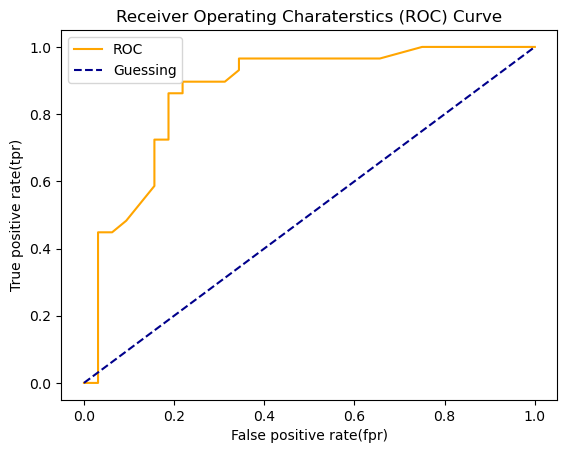

In [118]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    PLots a ROC curve given the false postivie rate (fpr)
    and true positive rate(tpr) of a model.
    """
 
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange", label="ROC")

    # Plot line with no predicitive power(Baseline)
    plt.plot([0,1] ,[0,1], color="darkblue", linestyle="--", label ="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver Operating Charaterstics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)


In [119]:
from sklearn.metrics import roc_auc_score
# auc-area under curve
roc_auc_score(y_test,y_probs_positive)

0.8679956896551724

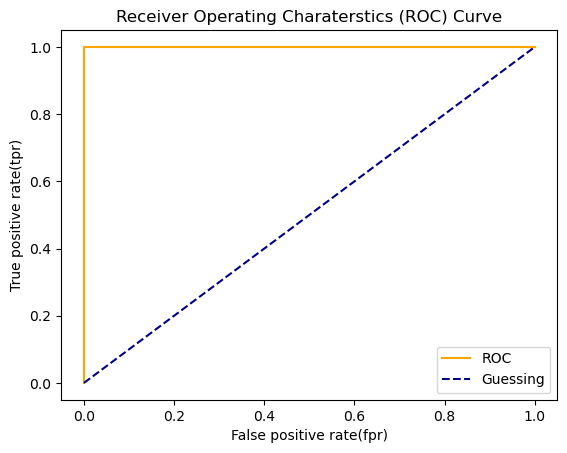

In [120]:
# Plot perfect ROC curve and AUC score
fpr,tpr,thresholds =roc_curve (y_test, y_test)
plot_roc_curve(fpr,tpr)

In [121]:
# Perfect AUC score 
roc_auc_score(y_test,y_test)

1.0

### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict
In essence, giving you an idea of where the model is getting confused

In [122]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(x_test)

confusion_matrix(y_test , y_preds)

array([[24,  8],
       [ 3, 26]])

In [123]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab (y_test,y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


In [124]:
24+8+3+26

61

In [125]:
len(y_preds)

61

In [126]:
len(x_test), len(y_test)

(61, 61)

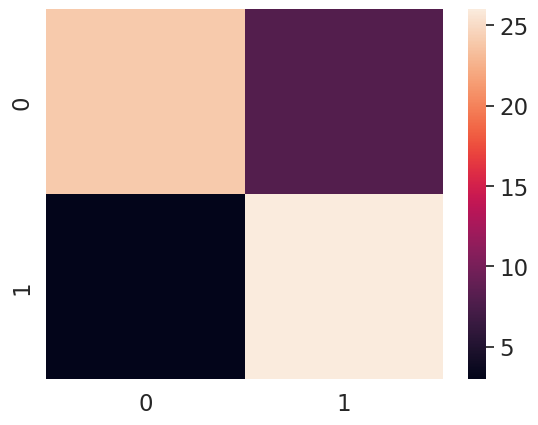

In [127]:
# Make our confusion matrix more visual with Seaborn"s heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using Scikit-learn

TO use the methods of creating a confusion matri with Scikit-Learn you will need sklearn version greater than 1.0 +

In [128]:
import sklearn
sklearn.__version__

'1.2.2'

In [129]:
model


RandomForestClassifier()

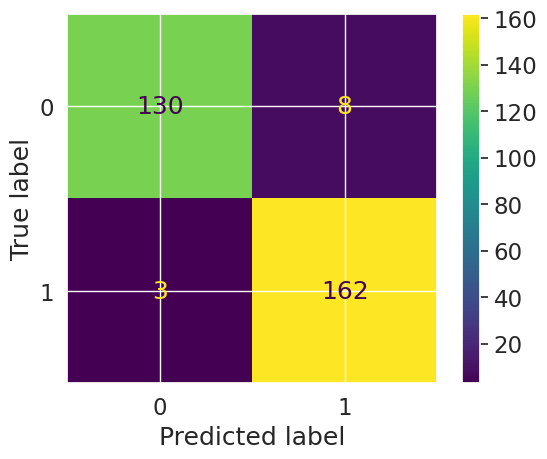

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model, X=x, y=y)

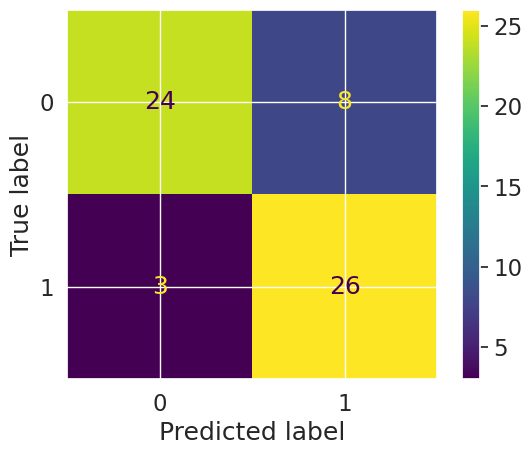

In [131]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

 ### Classification Report
 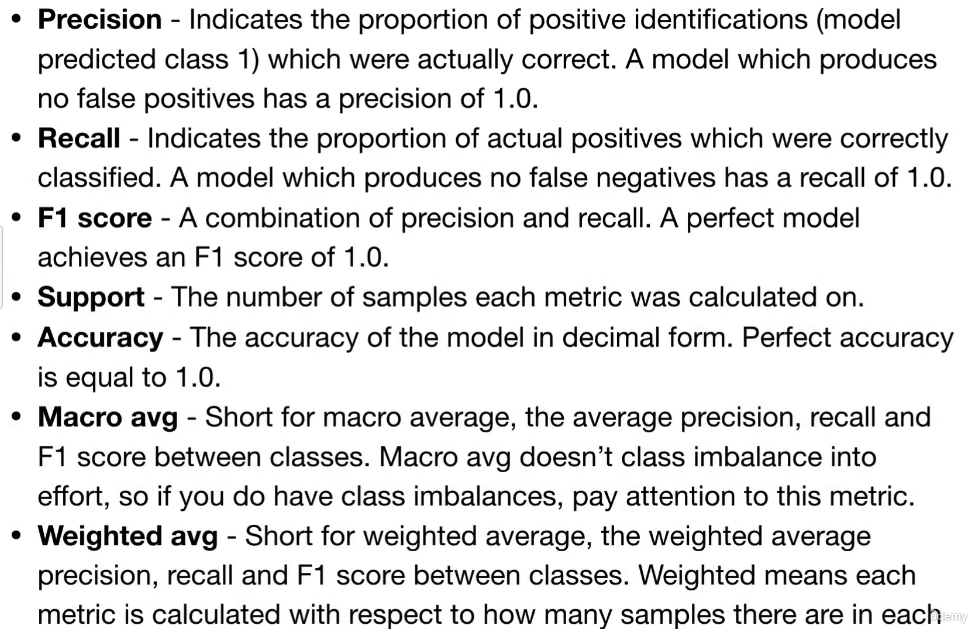


 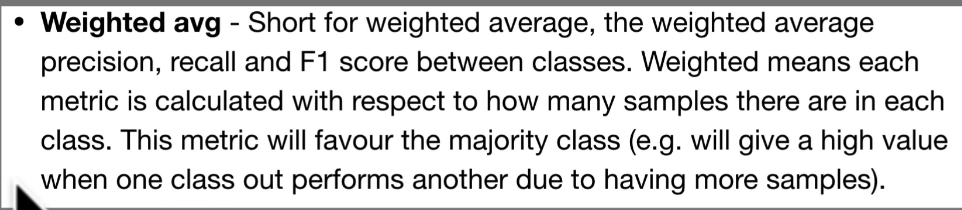

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [133]:
 # Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] =1 # only one postivie case


disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))



,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## 4.2.2.2 Regression model evaluation metrics
Model evaluation metrics documentation
1. R-square
2. Mean absolute error
3. Mean squared error

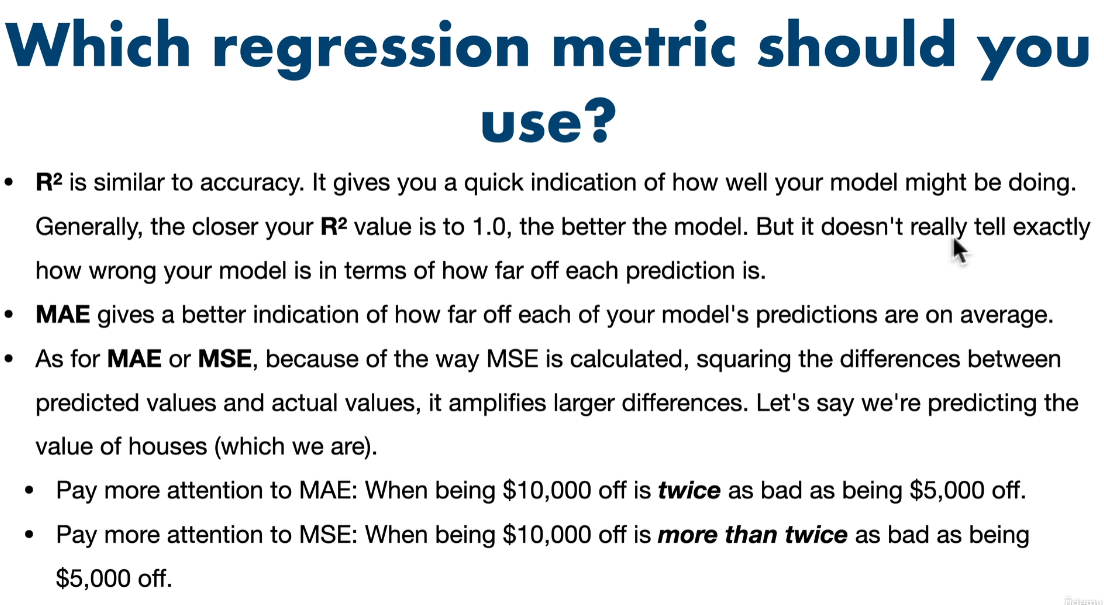

In [134]:
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

# Check the score  of the model on test set
model.score(x_test ,y_test)


0.8066196804802649

In [135]:
from sklearn.metrics import r2_score
# FIll an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [136]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [137]:
len(y_test_mean)

4128

In [138]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [139]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean Aboslute error (MAE)**

MAE is the average of the aboslute difference between prediction and actual values.

It gives an idea of how wrong your models predicitions are



In [140]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [141]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [142]:
# using formula
np.abs(df["differences"]).mean()


0.3265721842781009

**Mean square error(MSE)**

 MSE is the mean of the square of the erros between actuaL and predicted values

In [143]:
#Mean squared error
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse


0.2534073069137548

In [144]:
df["Squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,Squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [145]:
# using formula
np.abs(df["Squared_differences"]).mean()


0.2534073069137548

In [146]:
df_large_error=df.copy()
df_large_error.iloc[0]["Squared_differences"] = 16


In [147]:
df_large_error.head()

,actual values,predicted values,differences,Squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [148]:
 # mse with large error
df_large_error["Squared_differences"].mean()

0.25728320720794084

### 4.2.3 Finally using `scoring` parameter

In [149]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model=RandomForestClassifier()


In [150]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc=cross_val_score(model,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [151]:
# Cross_validate accuracy
print(f"The cross-validate accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validate accuracy is: 82.48%


In [152]:
np.random.seed(42)
cv_acc=cross_val_score(model,x,y,cv=5,scoring="accuracy")
cv_acc
# Cross_validate accuracy
print(f"The cross-validate accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validate accuracy is: 82.48%


In [153]:
# Precision
np.random.seed(42)
cv_precision=cross_val_score(model,x,y,cv=5,scoring="precision")
cv_precision

# Cross_validate precision
print(f"The cross-validate precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validate precision is: 83.30%


In [154]:
# Recall 
np.random.seed(42)
cv_recall=cross_val_score(model,x,y,cv=5,scoring="recall")
cv_recall


array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [155]:
# Cross_validate recall
print(f"The cross-validate recall is: {np.mean(cv_recall)}")

The cross-validate recall is: 0.8545454545454545


 ### Lets see scoring parameter for regression problem

In [156]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# fit the model ( on the training set)
model=RandomForestRegressor(n_estimators=100)


In [157]:
np.random.seed(42)
cv_r2=cross_val_score(model, x, y, cv=3)
np.mean(cv_r2)

0.6545756342466266

In [158]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [159]:
# Mean squared error
cv_mse = cross_val_score(model, x, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)


-0.46281833778669723

In [160]:
 # Mean absolute error
cv_mae=cross_val_score(model, x, y, cv=3, scoring="neg_mean_absolute_error")
cv_mae
np.mean(cv_mae)


-0.4820332646560079

### Using different evalution metrics as Scikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning model using sklearn.metrics module

In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Import algorithm
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantaniate RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000)

# fit the model to the data
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 86.89%
Precision: 0.8529411764705882
Recall: 0.90625
F1: 0.8787878787878787


In [168]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x=housing_df.drop('target',axis=1)
y=housing_df["target"]

# Split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# fit the model ( on the training set)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# Evaluate model using evaluation function
print("Refression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

Refression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548
